En este colab se va a extraer un a funcion de optimizacion para la variable **w** de la siguiente equacion:

**e = Re - (w*x)**






Analisis de funcion:

        **e = Re - (w*x)**
        Leyenda:
            *e -> error
            *Re ->resultado esperado
            *w -> peso
            *x -> input


Tabla de verdad de la funcion se hara una tabla en la que consideremos que todo son constantes excepto w y veremos como evoluciona la funcion teniendo en cuenta que queremos que el error se aproxime a 0:

    e      x      (w+1)
    -      -      queremos que aumente paraque e se aproxime a 0
    -      +      queremos que disminya para aproximar e a 0
    +      -      queremos que disminya para aproximar e a 0
    +      +      queremos que aumente paraque e se aproxime a 0

** Date cuenta de que Re no importa si es positivo o negativo aunque cambies el signo de Re sin cambier el signo de x y de e la evolucion que necesitamos de w es la misma

Ej

En este ejemplo si aumentamos w el error cada vez sera mas negativo y nos alejaremos del 0

Si disminuimos w cada vez sera menos negativo y el error se ira hacercando al 0

-0.4 = 1-(1*w)

Si cambiamos el error es positivo queremos que w en vez de disminuir aumente






Una vez hecho el analisis queremos diseñar una funcion que cumpla nuestra tabla de verdad:


    e      x      Resultado que queremos
    -      -      +
    -      +      -
    +      -      -
    +      +      +

El resultado de la equacion se debera añadir a w para su siguiente iteración

w = w + (e * x)

In [ ]:
import random

In [ ]:
def delta_rule(e : float, x : float, w : float, lr : float = 0.002 ):
  '''
  Regla optimización que actualiza w
  Params
      e-> error de la iteracion previa
      x -> input
      w-> peso de la iteracion pervia
      lr-> learning rate
  resultado
      wt-> la nueva version de w

  '''

  return w+lr*e*x

In [ ]:
def loss(Re: float, x: float, w:float):
  '''
  Funcion de calculo de perdida
  Params
      Re-> resultado esperado
      x -> input
      w-> peso de la iteracion pervia
  resultado
      e-> error de la iteracion previa

  '''
  return Re-(x*w)

In [ ]:
def optimization(epochs : int , x: float, Re: float):
  '''
  Funcion que aplica la regla de optimizacion y aproxima el error a 0
  Params
      epochs-> la cantidad de iteraciones que quiero aplicar al algoritmo
      x -> input
      Re-> resultado esperado

  '''
  w = random.uniform(0, 1)
  print('Initialization weight: ',w )
  for i in range(epochs):
    e = loss(Re,x,w)
    w = delta_rule(e,x,w)
    print('Error: ',e, ' Weight: ',w )


In [ ]:
optimization(epochs = 40,x = 2,Re = 2)

Initialization weight:  0.768948195754644
Error:  0.46210360849071197  Weight:  0.7707966101886069
Error:  0.4584067796227862  Weight:  0.772630237307098
Error:  0.454739525385804  Weight:  0.7744491954086412
Error:  0.4511016091827176  Weight:  0.7762536018453721
Error:  0.44749279630925587  Weight:  0.7780435730306091
Error:  0.44391285393878177  Weight:  0.7798192244463642
Error:  0.4403615511072716  Weight:  0.7815806706507933
Error:  0.43683865869841343  Weight:  0.783328025285587
Error:  0.43334394942882604  Weight:  0.7850614010833022
Error:  0.4298771978333955  Weight:  0.7867809098746358
Error:  0.42643818025072844  Weight:  0.7884866625956387
Error:  0.4230266748087226  Weight:  0.7901787692948736
Error:  0.41964246141025274  Weight:  0.7918573391405146
Error:  0.4162853217189708  Weight:  0.7935224804273905
Error:  0.412955039145219  Weight:  0.7951743005839713
Error:  0.40965139883205737  Weight:  0.7968129061792996
Error:  0.4063741876414009  Weight:  0.7984384029298651
Er

In [ ]:
def delta_rule_multiple(e : float, x : list, w : float, lr : float = 0.002 ):
  '''
  Regla optimización que actualiza w
  Params
      e-> error de la iteracion previa
      x -> input
      w-> peso de la iteracion pervia
      lr-> learning rate
  resultado
      wt-> la nueva version de w

  '''
  for i in x:
    w = w+lr*e*i
  return w

In [ ]:
def loss_multiple(Re: list, x: list, w:float):
  '''
  Funcion de calculo de perdida
  Params
      Re-> resultado esperado
      x -> input
      w-> peso de la iteracion pervia
  resultado
      e-> error de la iteracion previa

  '''

  return sum([e1-e2*w for e1,e2 in zip(Re,x)])/len(x)

Modelo para multiples

In [ ]:
def optimization_mltiple(epochs : int , x: list, Re: list):
  '''
  Funcion que aplica la regla de optimizacion y aproxima el error a 0
  Params
      epochs-> la cantidad de iteraciones que quiero aplicar al algoritmo
      x -> input
      Re-> resultado esperado

  '''
  w = random.uniform(0, 1)
  print('Initialization weight: ',w )
  for i in range(epochs):
    e = loss_multiple(Re,x,w)
    w = delta_rule_multiple(e,x,w)
    print('Error: ',e, ' Weight: ',w )

In [ ]:
inputs = [1,2,3,4,5]
outputs = [-2,-4,-6,-8,-10]
#x*w Modelo
optimization_mltiple(epochs = 100,x = inputs,Re = outputs)

Initialization weight:  0.01670676135376692
Error:  -6.0501202840613  Weight:  -0.16479684716807208
Error:  -5.505609458495784  Weight:  -0.32996513092294566
Error:  -5.010104607231163  Weight:  -0.4802682691398806
Error:  -4.559195192580358  Weight:  -0.6170441249172913
Error:  -4.148867625248125  Weight:  -0.7415101536747352
Error:  -3.775469538975795  Weight:  -0.854774239844009
Error:  -3.4356772804679734  Weight:  -0.9578445582580483
Error:  -3.126466325225855  Weight:  -1.051638548014824
Error:  -2.8450843559555277  Weight:  -1.13699107869349
Error:  -2.58902676391953  Weight:  -1.2146618816110757
Error:  -2.356014355166773  Weight:  -1.2853423122660788
Error:  -2.1439730632017637  Weight:  -1.3496615041621316
Error:  -1.9510154875136052  Weight:  -1.4081919687875397
Error:  -1.7754240936373809  Weight:  -1.461454691596661
Error:  -1.6156359252100168  Weight:  -1.5099237693529615
Error:  -1.4702286919411156  Weight:  -1.554030630111195
Error:  -1.337908109666415  Weight:  -1.5941

CON CLASES

In [ ]:
def loss(Y: list, X: list, forward_pass, fast : bool = False):
  '''
  Funcion de calculo de perdida
  Params
      Y-> resultado esperado
      X -> input
      forward_pass-> funcion de preiccion
      fast-> cambia funcion de error
  resultado
      e-> error de la iteracion previa

  '''
  if fast:
    s= sum([y-forward_pass(x)**3 for y,x in zip(Y,X)])
  else:
    #Esta funcion pemaliza mas los erroes altos
    s= sum([y-forward_pass(x) for y,x in zip(Y,X)])
  return s/len(X)

In [ ]:
def delta_rule(e : float, X : list, w : float, lr : float = 0.002 ):
  '''
  Regla optimización que actualiza w
  Params
      e-> error de la iteracion previa
      X -> input
      w-> peso de la iteracion pervia
      lr-> learning rate
  resultado
      wt-> la nueva version de w

  '''
  for x in X:
    w = w+lr*e*x
  return w

In [ ]:
class Neuron:

  def __init__(self,):
    self.w = random.uniform(-1,1)
    self.b = random.uniform(-1,1)

  def compile(self,**kargs):
    '''
    Setea perdida, optimizacion ...
    Params
      loss -> funcion de perdida para evaluar el error
      optimization -> funcion para actualizar el valor de pesos
      lr -> learning rate

    '''
    self.loss = kargs.get("loss")
    self.optimization = kargs.get("optimization")
    self.lr = kargs.get("lr")

  def fit(self,**kargs):
    '''
    Hiperparametros del modelo
    Params
      x->input data
      y->output data
      epochs->iterations
    '''

    self.x = kargs.get("x")
    self.y = kargs.get("y")
    self.epochs = kargs.get("epochs")

  def train(self):
    '''
    Entrena los pesos
    Param
      None
    return
      historic -> diccionario con error y perdid
    '''
    historic={"error":[],
              "peso":[],
              "accuracy":[]
              }

    for i in range(self.epochs):
      e = self.loss(self.y,self.x, self.predict)
      self.w = self.optimization(e,self.x,self.w,self.lr)
      historic["error"].append(e)
      historic["peso"].append(self.w)
      historic["accuracy"].append(1-(e/sum(self.y)))
    return historic

  def predict(self,input):
    return input*self.w

In [ ]:
inputs = [1,2,3,4,5]
outputs = [-2,-4,-6,-8,-10]

neuron = Neuron()
neuron.compile(loss=loss,optimization=delta_rule,lr=0.0022)
neuron.fit(x=inputs,y=outputs,epochs = 100)
hist = neuron.train()
for e,p,a in zip(hist['error'],hist['peso'],hist['accuracy']):
  print('Error: ',e,' Peso: ',p, 'Accuracy: ',a)


Error:  -7.39097752615379  Peso:  0.2197569170215216 Accuracy:  0.7536340824615403
Error:  -6.6592707510645655  Peso:  9.822363909173237e-07 Accuracy:  0.7780243082978479
Error:  -6.000002946709172  Peso:  -0.19799911500501177 Accuracy:  0.7999999017763609
Error:  -5.406002654984965  Peso:  -0.37639720261951565 Accuracy:  0.8197999115005011
Error:  -4.870808392141454  Peso:  -0.5371338795601837 Accuracy:  0.8376397202619515
Error:  -4.388598361319449  Peso:  -0.6819576254837255 Accuracy:  0.8537133879560184
Error:  -3.954127123548824  Peso:  -0.8124438205608367 Accuracy:  0.8681957625483725
Error:  -3.56266853831749  Peso:  -0.9300118823253138 Accuracy:  0.8812443820560837
Error:  -3.2099643530240582  Peso:  -1.0359407059751078 Accuracy:  0.8930011882325314
Error:  -2.8921778820746766  Peso:  -1.1313825760835723 Accuracy:  0.9035940705975107
Error:  -2.605852271749283  Peso:  -1.2173757010512987 Accuracy:  0.9131382576083572
Error:  -2.3478728968461042  Peso:  -1.29485550664722 Accurac

In [ ]:
neuron.predict(300)

-599.978062810864

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


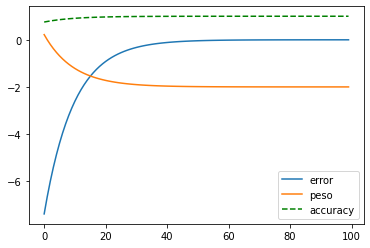

In [ ]:
plt.plot(hist['error'])
plt.plot(hist['peso'])
plt.plot(hist['accuracy'],'--g')

plt.legend(hist.keys())

plt.show()